# PyGAF Grid Classes
This notebook demonstrates the features of PyGAF grid class. The grid classes are used with 2D solutions; for example, to generate tables and contours of head, drawdown or impress.

Installed `PyGAF` testing

In [ ]:
import pygaf
%matplotlib inline

Local testing

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

## `SteadyWellGrid` class
Instanciate a `SteadyWellGrid` object using a `SteadyWell` object and grid radius `.gr`. The well grid is a grid of regularly spaced points. The default grid density `.gd` defining the number of rows and columns of points is 21 (441 grid points) and can be between 11 and 41 (121 to 1681 grid points). The grid points settings are accessed using the `.pts` attribute of the grid, which returns a Pandas dataframe.

The well object is inherited by the grid object and is accessed via the `.well` attribute of the grid.
- Create a steady well object with specified location and pumping rate
- Create a well grid with specified radius
- Assign the well to the well grid

In [2]:
W = pygaf.SteadyWell(x=4000, y=3000, q=-500)
WG = pygaf.SteadyWellGrid(gr=3500)
WG.well = W

The grid information and diagram are displayed using the `.info` and `.draw` methods of the grid object.

WELL INFORMATION
----------------
Type: Steady state
Name: Steady state flowing well
Coordinates: 4000 , 3000
Radius: 0.05 [L]
Penetration: 1
Well rate: -500 [L3/T]
State: extract

WELL GRID INFORMATION
---------------------
Grid radius: 3500
Number of grid points: 441
Grid density: 21



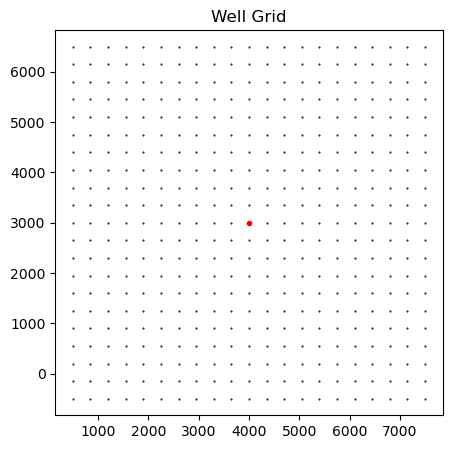

In [3]:
WG.well.info()
WG.info()
WG.draw()

Grid points are accessed using the `.pts` method. Local coordinates assume the well is at location (0, 0). The world coordinates are based on the assigned center coordinates of the well.

In [4]:
WG.pts

,locx,locy,worldx,worldy,rad
0,-3500.0,-3500.0,500.0,-500.0,4949.747468
1,-3150.0,-3500.0,850.0,-500.0,4708.768416
2,-2800.0,-3500.0,1200.0,-500.0,4482.186966
3,-2450.0,-3500.0,1550.0,-500.0,4272.294466
4,-2100.0,-3500.0,1900.0,-500.0,4081.666326
...,...,...,...,...,...
436,2100.0,3500.0,6100.0,6500.0,4081.666326
437,2450.0,3500.0,6450.0,6500.0,4272.294466
438,2800.0,3500.0,6800.0,6500.0,4482.186966
439,3150.0,3500.0,7150.0,6500.0,4708.768416


The `.draw` method displays the grid in world coordinates. Set `local=True` to display the grid in local coordinates with the well at position (0, 0).

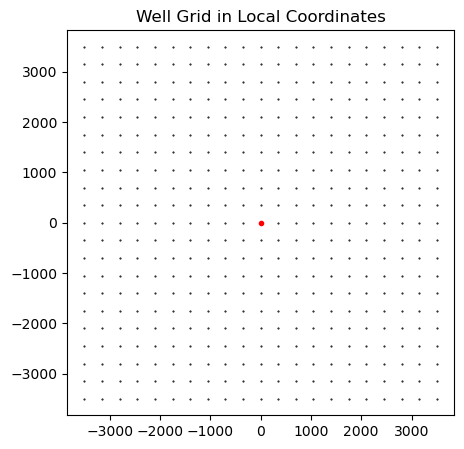

In [5]:
WG.draw(local=True)

Grid density can be changed using the `.gd` attribute of the grid. Automatic constraints are applied to limit the grid density to the allowable minimum and maximum grid densities. The minimum grid density is 11 (121 grid points) and the maximum density is 41 (1681 grid points). Automatic adjustment is performed if a grid density outside this range is specified. A notification that the grid density has been constrained is exposed through the `.info` method of the grid.

This example is within the grid density constraints.

WELL GRID INFORMATION
---------------------
Grid radius: 3500
Number of grid points: 625
Grid density: 25



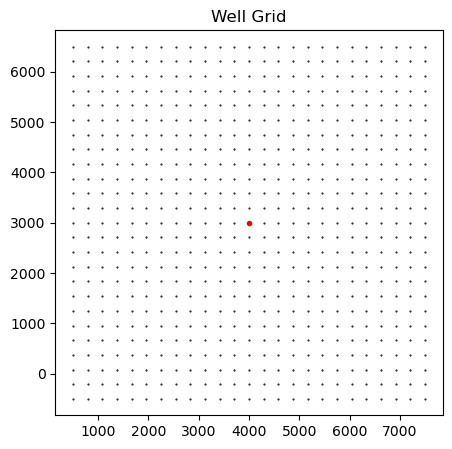

In [6]:
WG.gd = 25
WG.info()
WG.draw()

This example specifies a grid density below the minimum constraints and triggers automatic adjustment to increase grid density.

WELL GRID INFORMATION
---------------------
Notice! grid spacing has been increased to enforce the minimum grid density of 121 points.
Grid radius: 3500
Number of grid points: 121
Grid density: 11



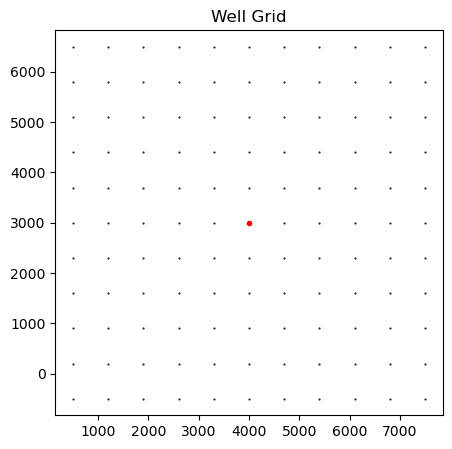

In [7]:
WG.gd = 5
WG.info()
WG.draw()

This example specifies a grid density above the maximum constraints and triggers automatic adjustment to reduce grid density.

WELL GRID INFORMATION
---------------------
Notice! grid spacing has been decreased to enforce the maximum grid density of 1681 points.
Grid radius: 3500
Number of grid points: 1681
Grid density: 41



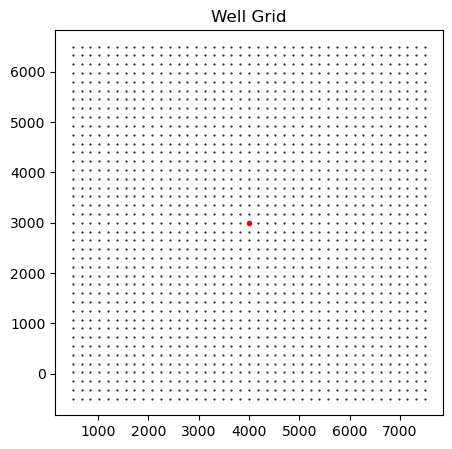

In [8]:
WG.gd = 50
WG.info()
WG.draw()

## `BasinGrid` class
Instanciate a `BasinGrid` object using a `Basin` object and grid radius `gr`. The default grid density `gd` is 21 (441 grid points) and can be set between 11 and 41 (121 to 1681 grid points). The basin object is inherited by the grid object and accessed via `.basin` attribute of the grid. The grid information and diagram are displayed using the `.info` and `.draw` methods of the grid object.
- Create a rectangular basin object with specified location
- Create a basin grid with specified radius
- Assign the basin to the basin grid
- Display basin grid information
- Draw the basin grid

BASIN GRID INFORMATION
----------------------
Grid radius: 1000
Number of grid points: 441
Grid density: 21

BASIN INFORMATION
-----------------
Type: Rectangular Basin
Name: Rectangle basin
Basin center: (200, 400) [L]
Basin x length: 10 [L]
Basin y length: 10 [L]
Basin area: 100 [L2]
Clockwise rotation angle: 0 [deg]



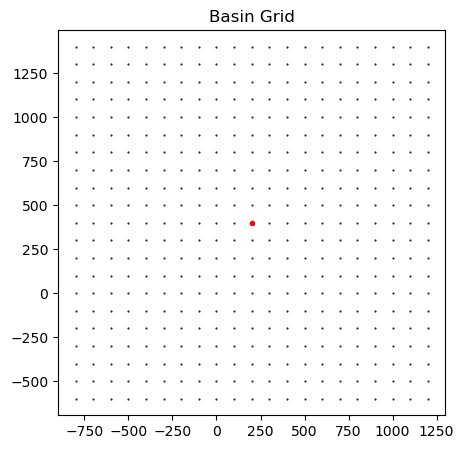

In [9]:
B1 = pygaf.RectBasin(cx=200, cy=400)
BG1 = pygaf.BasinGrid(gr=1000)
BG1.basin = B1
BG1.info()
BG1.basin.info()
BG1.draw()

The `.draw` method displays a plot of the grid. Set `local=True` to display the grid in in local coordinates with the basin center positioned at coordinates (0, 0).

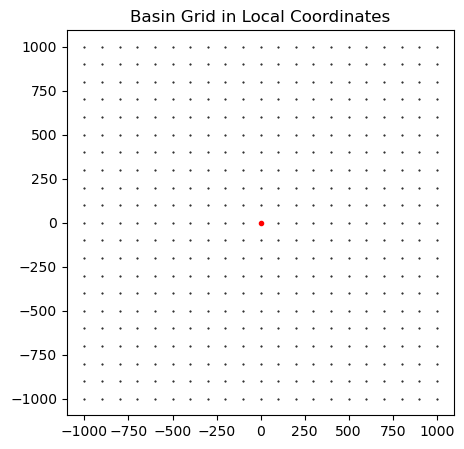

In [10]:
BG1.draw(local=True)

Rectangular basins have a rotation `.rot` attribute that specifies the clockwise rotation angle of the basin with a default value of 0 deg.

In [11]:
B2 = pygaf.RectBasin(cx=20, cy=40, rot=15)
BG2 = pygaf.BasinGrid(gr=1200)
BG2.basin = B2

In [12]:
BG2.info()
BG2.basin.info()

BASIN GRID INFORMATION
----------------------
Grid radius: 1200
Number of grid points: 441
Grid density: 21

BASIN INFORMATION
-----------------
Type: Rectangular Basin
Name: Rectangle basin
Basin center: (20, 40) [L]
Basin x length: 10 [L]
Basin y length: 10 [L]
Basin area: 100 [L2]
Clockwise rotation angle: 15 [deg]



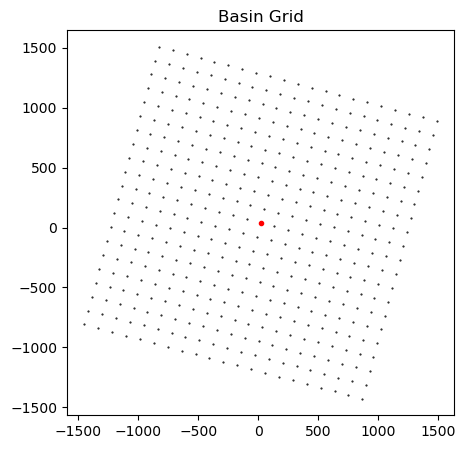

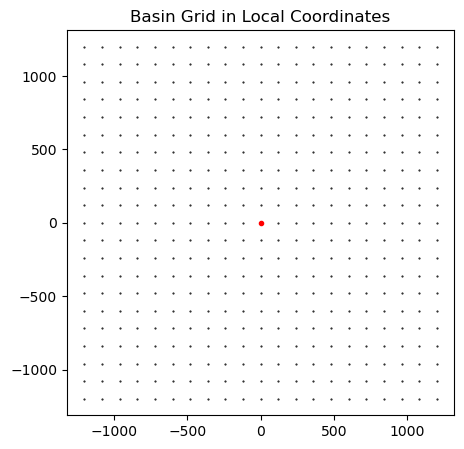

In [13]:
BG2.draw()
BG2.draw(local=True)

The rotation attribute of the basin object is inherited by the grid object; rotated coordinates are calculated for both the local and world grids.

In [14]:
BG2.pts

,locx,locy,rotx,roty,worldx,worldy,dx,dy
0,-1200.0,-1200.0,-1469.693846,-848.528137,-1449.693846,-808.528137,-1200.0,-1200.0
1,-1080.0,-1200.0,-1353.782747,-879.586423,-1333.782747,-839.586423,-1080.0,-1200.0
2,-960.0,-1200.0,-1237.871647,-910.644708,-1217.871647,-870.644708,-960.0,-1200.0
3,-840.0,-1200.0,-1121.960548,-941.702994,-1101.960548,-901.702994,-840.0,-1200.0
4,-720.0,-1200.0,-1006.049449,-972.761279,-986.049449,-932.761279,-720.0,-1200.0
...,...,...,...,...,...,...,...,...
436,720.0,1200.0,1006.049449,972.761279,1026.049449,1012.761279,720.0,1200.0
437,840.0,1200.0,1121.960548,941.702994,1141.960548,981.702994,840.0,1200.0
438,960.0,1200.0,1237.871647,910.644708,1257.871647,950.644708,960.0,1200.0
439,1080.0,1200.0,1353.782747,879.586423,1373.782747,919.586423,1080.0,1200.0
